# Решение задачи Титаник на Kaggle для начинающих

«Титаник» — известная задача на Kaggle (интернет-ресурс, содержащий наборы задач в области Data Science. Kaggle проводит соревнования между программистами совместно с несколькими крупными технологическими компаниями, такими как Google).
Датасет Титаник содержит данные о пассажирах корабля. Он включает информацию о пассажирах: возраст, пол, число братьев и сестер, порт посадки, выжили ли они в катастрофе.


Перевод статьи A beginner’s guide to Kaggle’s Titanic problem, автор — Sumit Mukhija, ссылка  https://neurohive.io/ru/osnovy-data-science/razbor-resheniya-zadachi-titanik-na-kaggle-dlya-nachinajushhih/.

Используемые библиотеки
- Pandas
- Seaborn
- Sklearn


In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# Setting up visualisations
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize':(12,7),
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

## Начальный этап
На начальном этапе необходимо рассмотреть признаки полного датасета, изучить и осмыслить их значения.

### 1. Загрузка данных
Полученный датасет содержит 1309 строк и 12 столбцов. Каждая строка представляет уникального пассажира Титаника, а в каждом столбце содержатся количественные или категориальные признаки для каждого пассажира.


In [3]:


td = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/titanic_train.csv')
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Данные

In [4]:
td.shape

(891, 12)

Данные состоят из 891 строки и  12 сталбцов. Все названия столбцов правильные.

In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Пять столбцов целочисленных типов, пять типов категориальных и два столбца с вещественными значениями. Есть столбцы с отсутстующими значениями.Датасет содержит несколько столбцов, в которых отсутствовали значения.

### 2. Пропущенные значения

Датасет содержит несколько столбцов, в которых отсутствовали значения. Признак «Cabin» имеет 687 пропущенных значений. Столбец «Embarked», который отображает пункт посадки пассажиров, имеет всего 2 пропущенных значения. В признаке «Age» - 177 пропущенных значения.



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


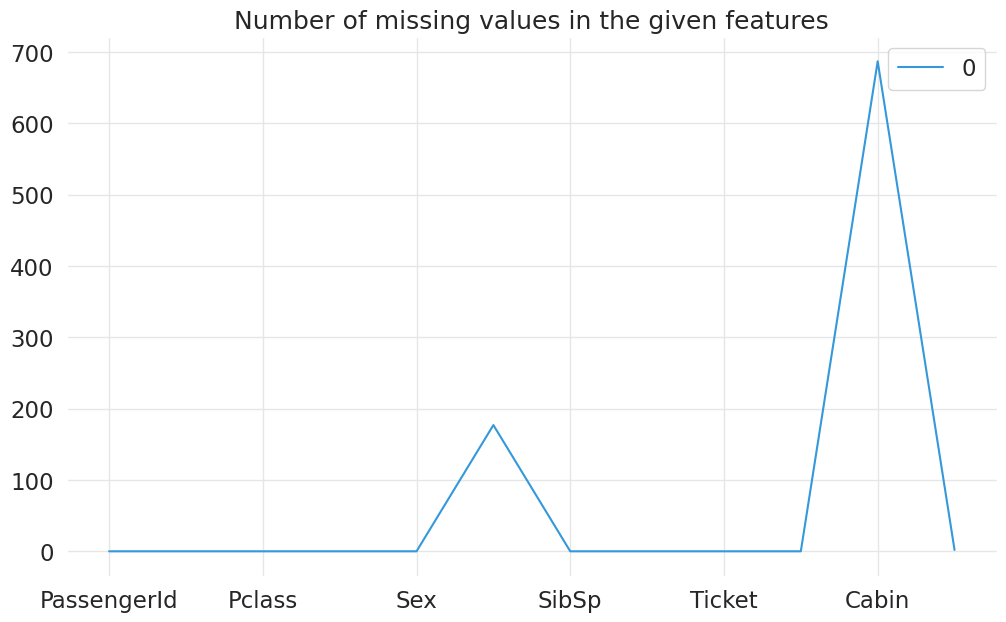

In [7]:
pd.DataFrame(td.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
td.isnull().sum()

Text(0.5, 1.0, 'Missing values heatmap')

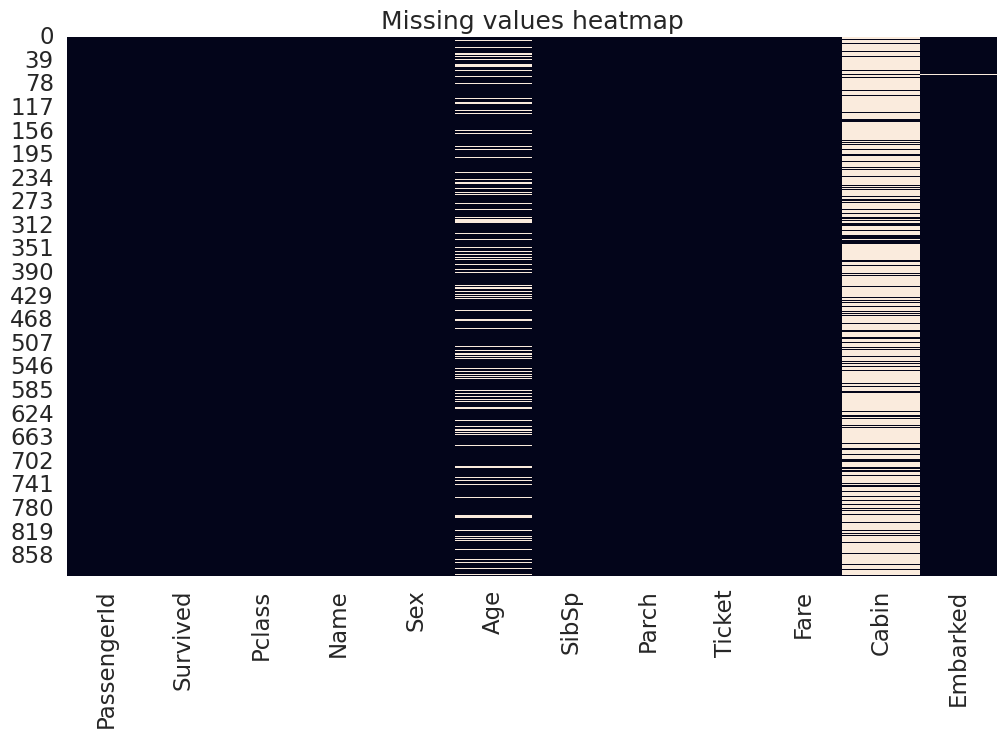

In [8]:
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [9]:
MissingValue = td.isnull().sum().sort_values(ascending = False)
Percent = (td.isnull().sum()/td.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['Пропущенные значения', 'Процент'])
MissingData

,Пропущенные значения,Процент
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


77.5%  столбца 'Cabin' отсутстуют. столбец не информативен, удалим его.

'Embarked' отсуствуют 2 строки. можно удалить 2 строки.

Столбец 'Age' с другой стороны имеет 177 отсутствующих значений, которые составляют 20% от общего ожидаемого значения. Мы вменим возрастные данные, классифицируя людей на основе их названия и находя медианный возраст.


### 3. Количество уникальных значений

Чтобы понять категориальные данные в обучающих данных, мы перечислим все столбцы с количеством уникальных значений, которые они имеют. Мы делаем вывод, что

выжил, и пол может иметь две различные ценности
Embarked и PClass имеют три различных значения
Итак, у нас есть четыре столбца катеографических данных - Выжившие, Пол, Посадка и PClass.

In [10]:
td.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


# Признаки
Изучив данные датасета, можно приступить к  исследованию признаков и роли, которую они сыграли в судьбе путешественника. Проанализируем каждый из параметров.

### Survived


Text(0.5, 1.0, 'Процентное соотношение выживших и погибших')

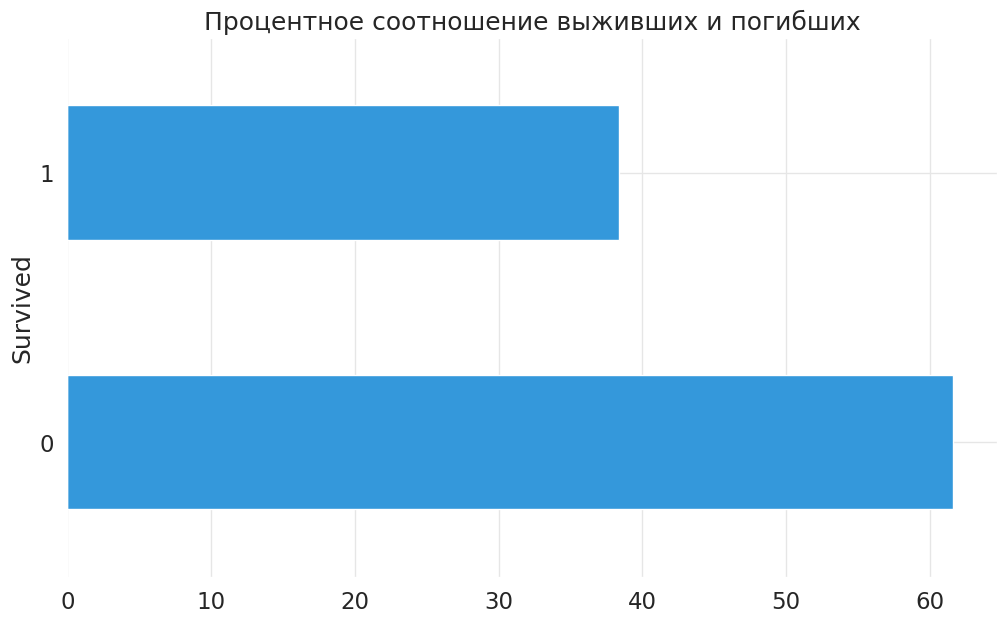

In [11]:
(td.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Процентное соотношение выживших и погибших")


**Первый признак отражает выжил пассажир или умер. Параметр показывает, что более 60% пассажиров погибли.**

### Класс
Данный признак отражает в каюте какого класса путешествовал пассажир. Пассажиры могли выбрать из трех отдельных классов, а именно: класс 1, класс 2 и класс 3.  


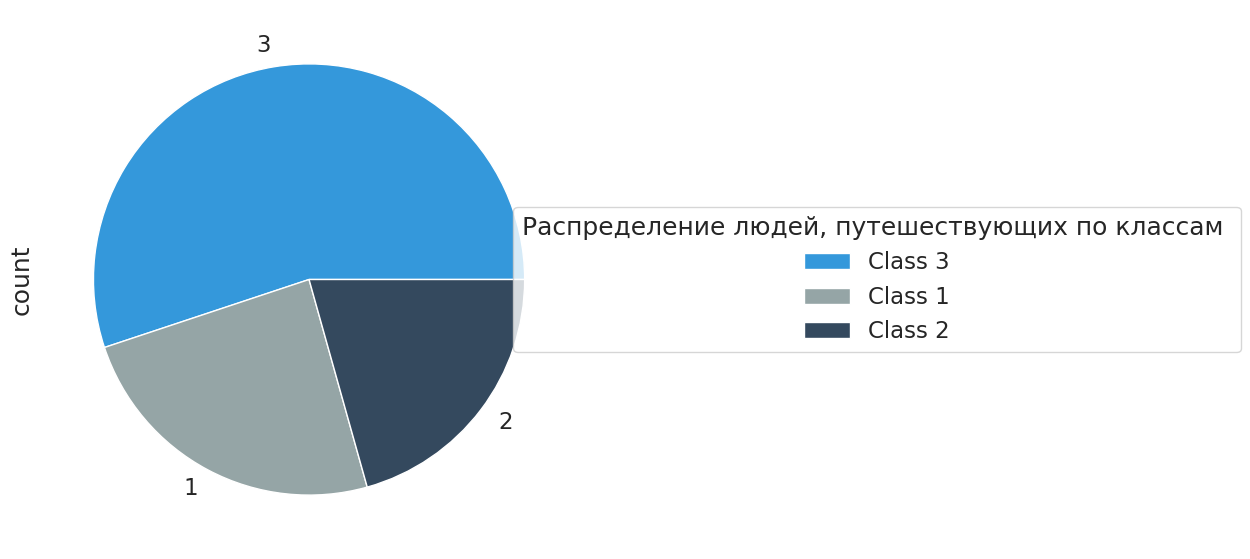

In [12]:
fig_pclass = td.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Распределение людей, путешествующих по классам ")


Анализ параметра показал, что третий класс имел наибольшее количество пассажиров, затем класс 2 и класс 1.

<ipython-input-13-1089688159>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass_1_survivor_distribution = round((td[td.Pclass == 1].Survived == 1).value_counts()[1]/len(td[td.Pclass == 1]) * 100, 2)
<ipython-input-13-1089688159>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass_2_survivor_distribution = round((td[td.Pclass == 2].Survived == 1).value_counts()[1]/len(td[td.Pclass == 2]) * 100, 2)
<ipython-input-13-1089688159>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

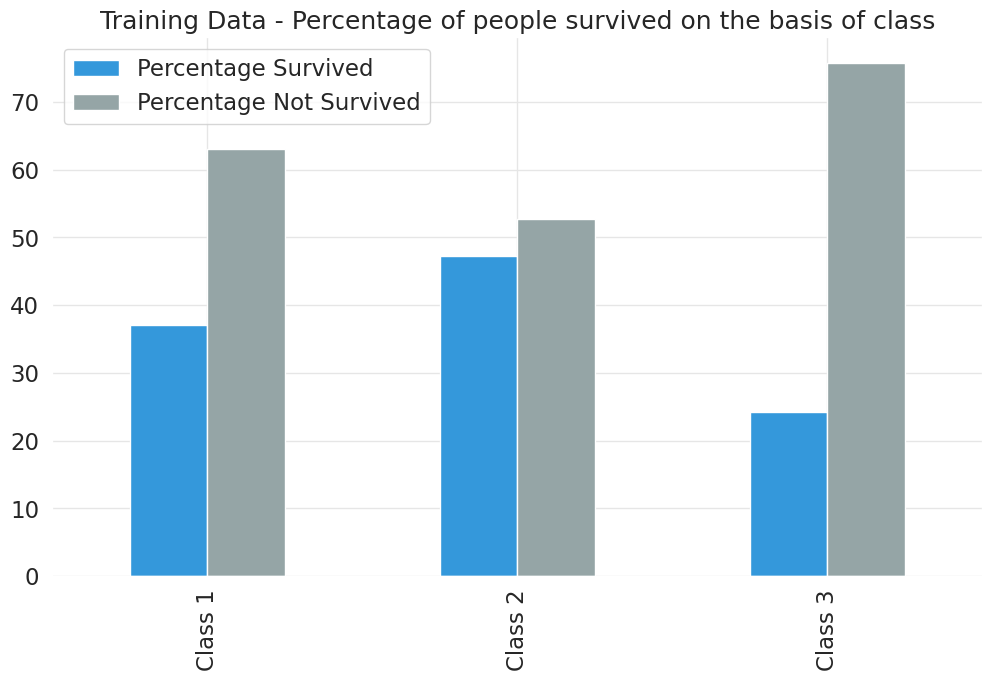

In [13]:
pclass_1_survivor_distribution = round((td[td.Pclass == 1].Survived == 1).value_counts()[1]/len(td[td.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((td[td.Pclass == 2].Survived == 1).value_counts()[1]/len(td[td.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((td[td.Pclass == 3].Survived == 1).value_counts()[1]/len(td[td.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")


 **Количество пассажиров в третьем классе было больше, чем количество пассажиров в первом и втором классе вместе взятых. Вероятность выживания пассажира класса 1 была выше, чем пассажира класса 2 и класса 3.**

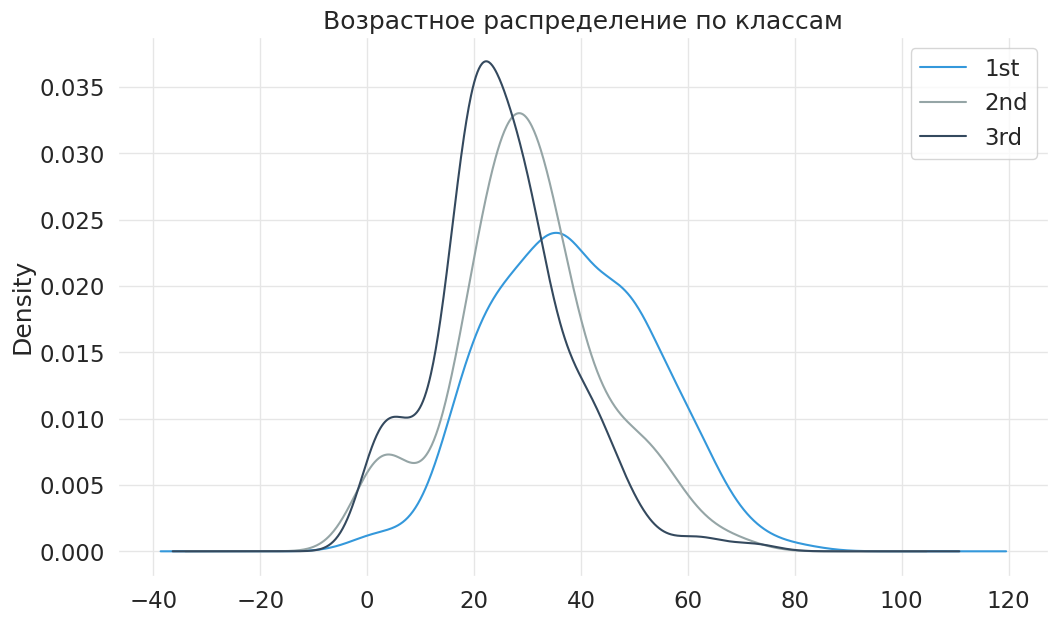

In [14]:
for x in [1,2,3]:    ## for 3 classes
    td.Age[td.Pclass == x].plot(kind="kde")
plt.title("Возрастное распределение по классам")
plt.legend(("1st","2nd","3rd"))

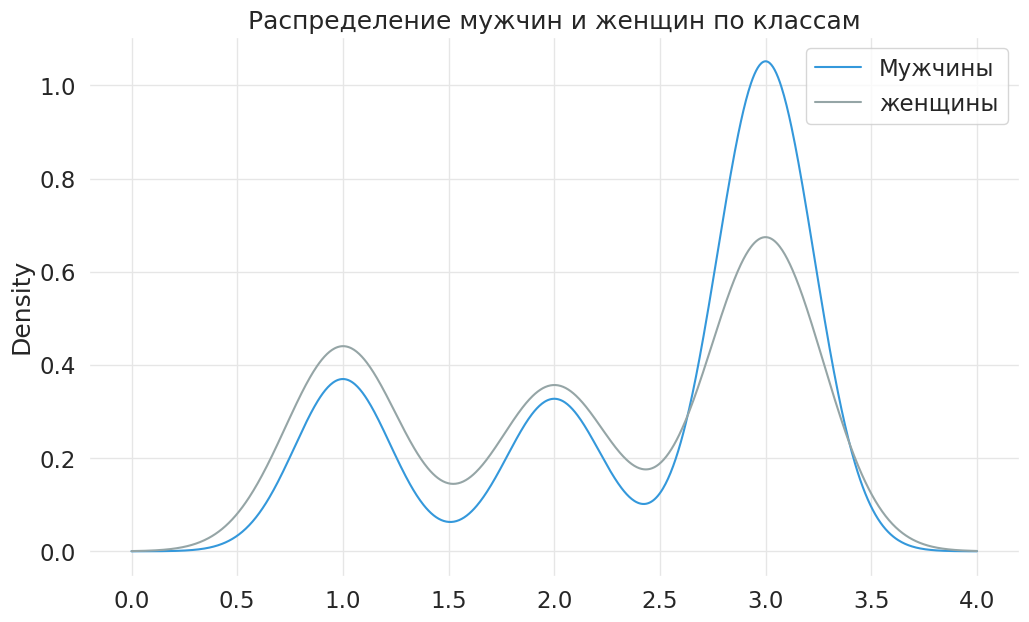

In [15]:
for x in ["male","female"]:
    td.Pclass[td.Sex == x].plot(kind="kde")
plt.title("Распределение мужчин и женщин по классам")
plt.legend(("Мужчины","женщины"))

In [16]:
pclass_perc_df

,Percentage Survived,Percentage Not Survived
Class 1,37.04,62.96
Class 2,47.28,52.72
Class 3,24.24,75.76


###  Пол
Примерно 65% пассажиров составляли мужчины, а остальные 35% — женщины.

<ipython-input-17-2943935635>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_pr = round((td[td.Sex == 'male'].Survived == 1).value_counts()[1]/len(td.Sex) * 100, 2)
<ipython-input-17-2943935635>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_pr = round((td[td.Sex == 'female'].Survived == 1).value_counts()[1]/len(td.Sex) * 100, 2)


<Axes: xlabel='Sex'>

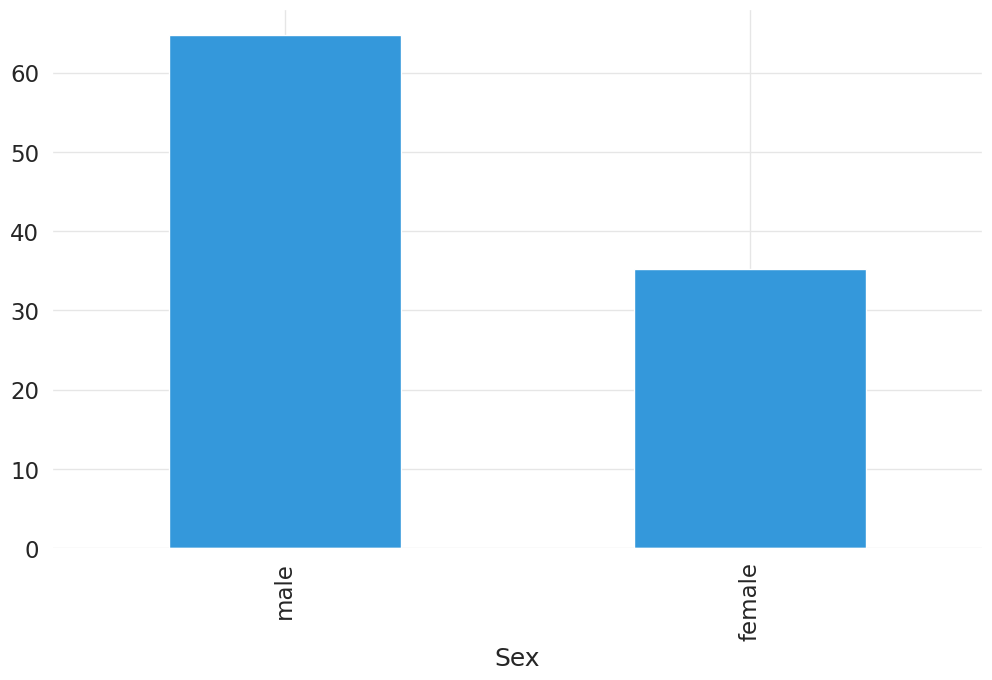

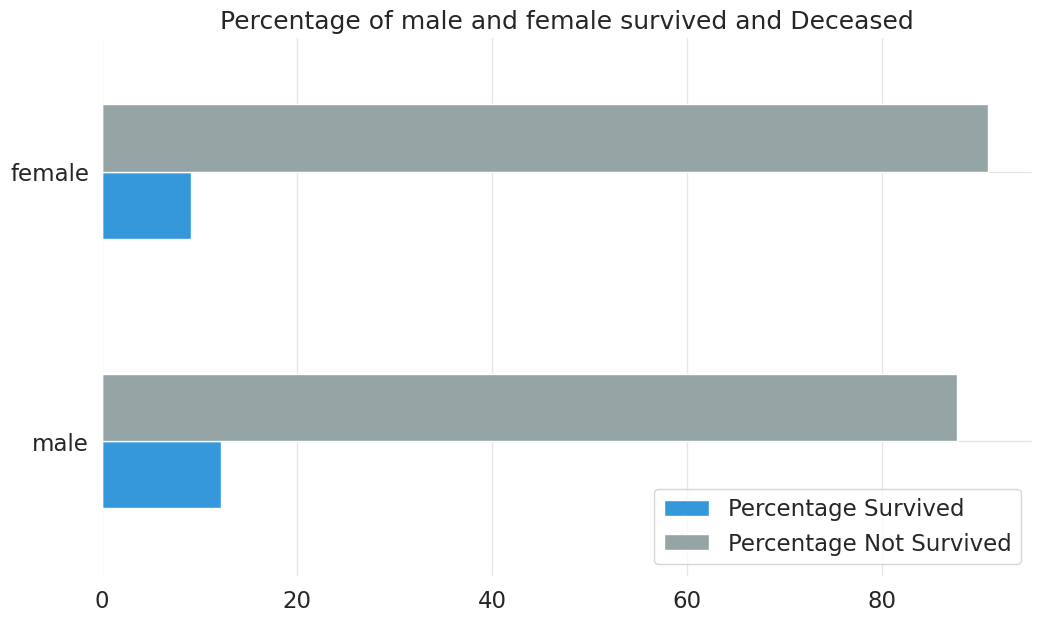

In [17]:
fig_sex = (td.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((td[td.Sex == 'male'].Survived == 1).value_counts()[1]/len(td.Sex) * 100, 2)
female_pr = round((td[td.Sex == 'female'].Survived == 1).value_counts()[1]/len(td.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

**Параметр показывает, что примерно 65% пассажиров составляли мужчины, а остальные 35% — женщины. Тем не менее, процент выживших женщин был выше, чем число выживших мужчин. Более 80% мужчин умерли, в сравнении с примерно 85% женщинами.**

### Age

In [18]:
pd.DataFrame(td.Age.describe())

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Самому молодому путешественнику на борту было около двух месяцев, а самому старшему — 80 лет. Средний возраст пассажиров на борту был чуть менее 30 лет. Большая часть детей в возрасте до 10 лет выжила. В любой другой возрастной группе число жертв было выше, чем число выживших. Более 140 человек в возрастной группе 20-30 лет погибли в сравнении с примерно 80 выжившими того же возраста.

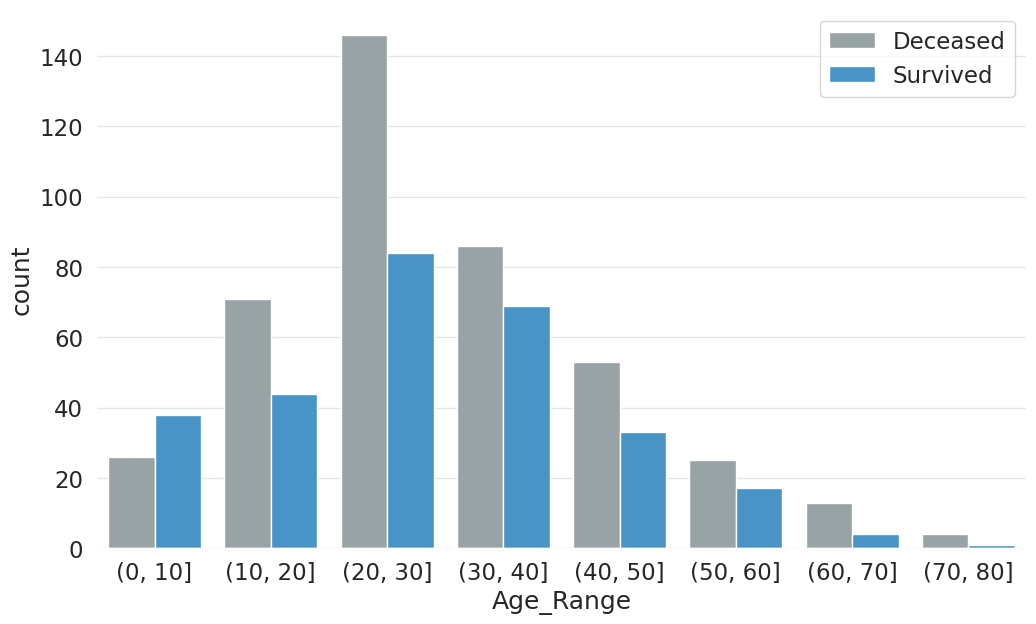

In [19]:
td['Age_Range'] = pd.cut(td.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])


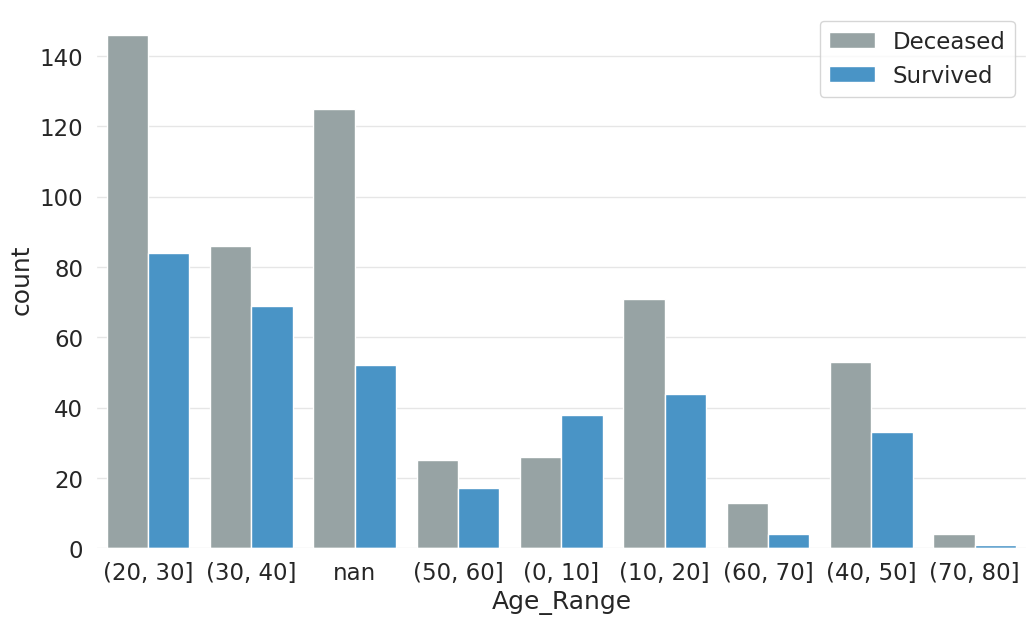

In [20]:
td['Age_Range'] = pd.cut(td.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
td['Age_Range'] = td['Age_Range'].astype(str)
td['Survived'] = td['Survived'].astype(str)

sns.countplot(x = "Age_Range", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])


<Axes: xlabel='Age', ylabel='Count'>

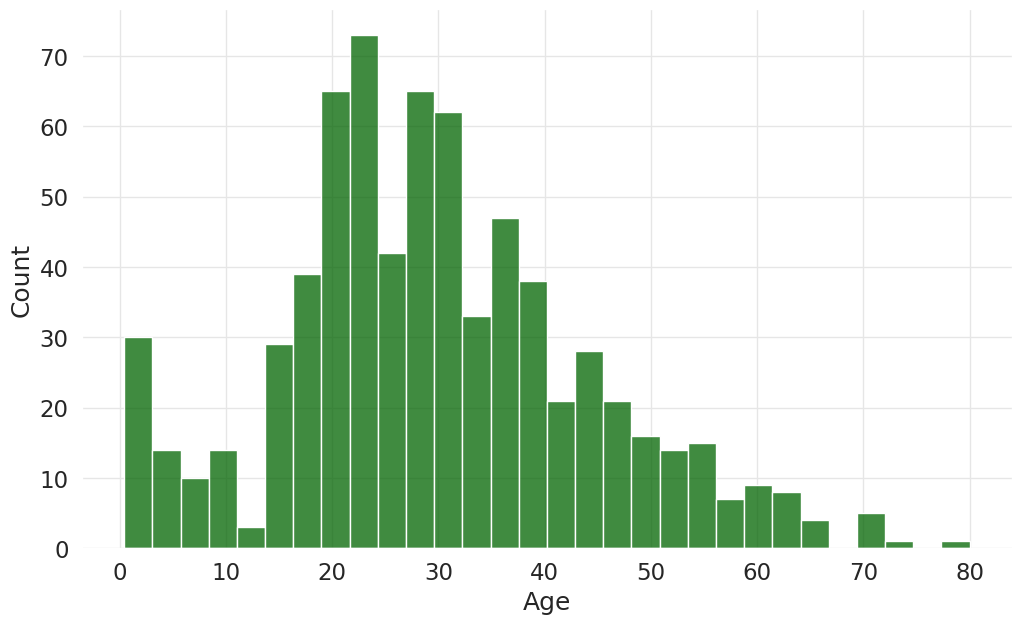

In [21]:
sns.histplot(td['Age'].dropna(),color='darkgreen',bins=30)

### SibSp
SibSp — это число членов семьи пассажира (братьев, сестер, мужей, жен), находившихся на борту. Максимум 8 братьев и сестер путешествовали вместе с одним из путешественников.

In [22]:
td.SibSp.describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


Text(0.5, 1.0, 'Training Data - Number of siblings or spouses vs survival count')

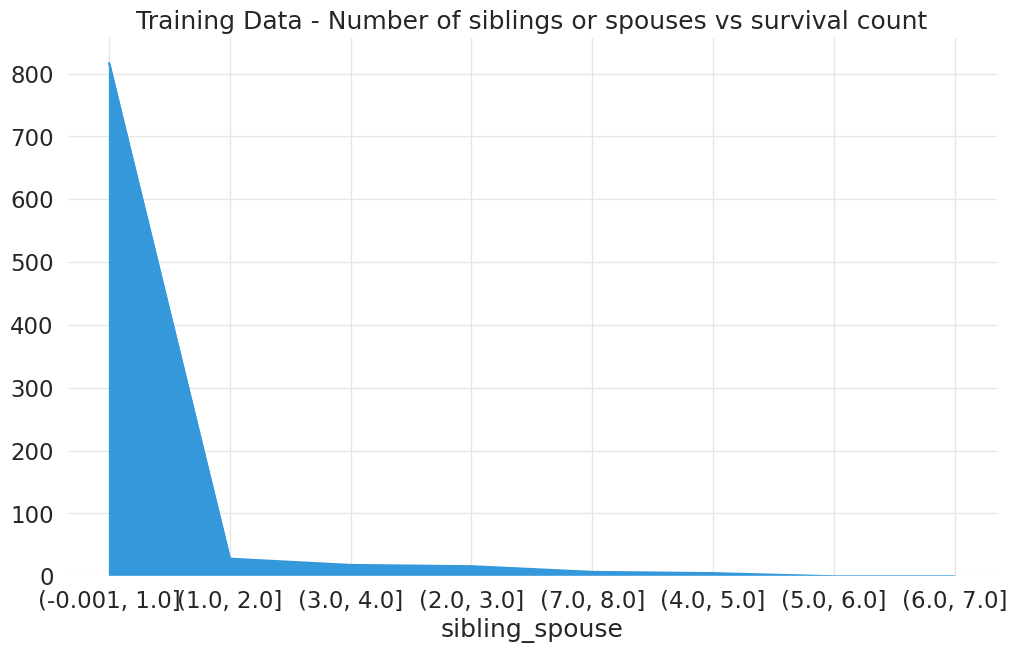

In [23]:
ss = pd.DataFrame()
ss['survived'] = td.Survived
ss['sibling_spouse'] = pd.cut(td.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(ss.sibling_spouse.value_counts()).plot.area().set_title("Training Data - Number of siblings or spouses vs survival count")

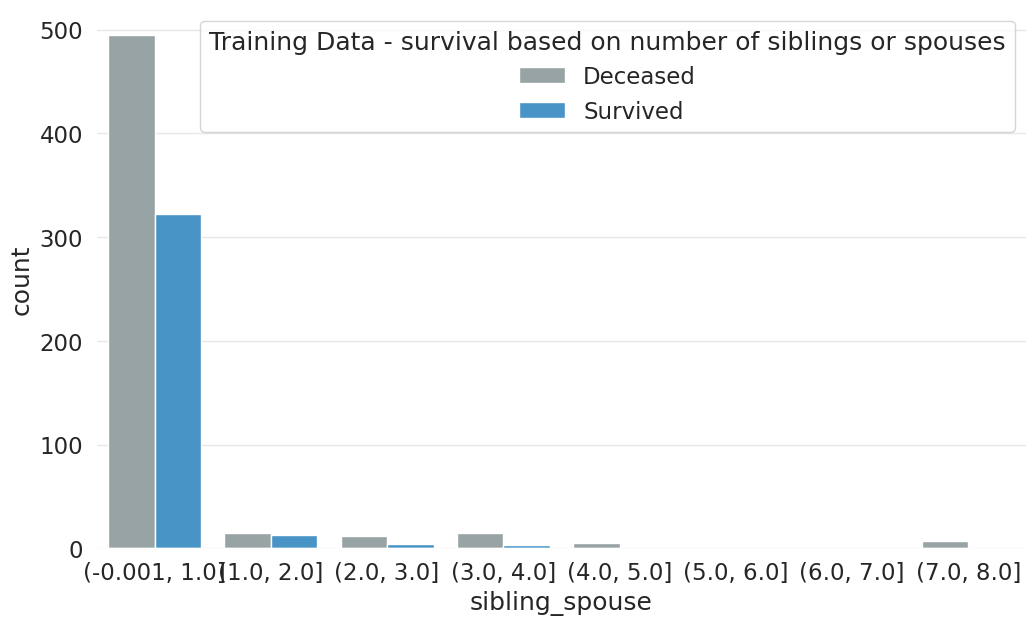

In [24]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = ss, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - survival based on number of siblings or spouses")

**Более 90% людей путешествовали в одиночку или с одним из своих братьев и сестер или супругом(ой). Шансы на выживание резко падали, если кто-то ездил с более чем двумя родными.**

###  Parch
Подобно SibSp, этот признак содержал количество родителей или детей, с которыми путешествовал каждый пассажир. Максимум 9 родителей/детей путешествовали вместе с одним из пассажиров.



In [25]:
pd.DataFrame(td.Parch.describe())

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


Text(0.5, 1.0, 'Training Data - Number of parents/children and survival density')

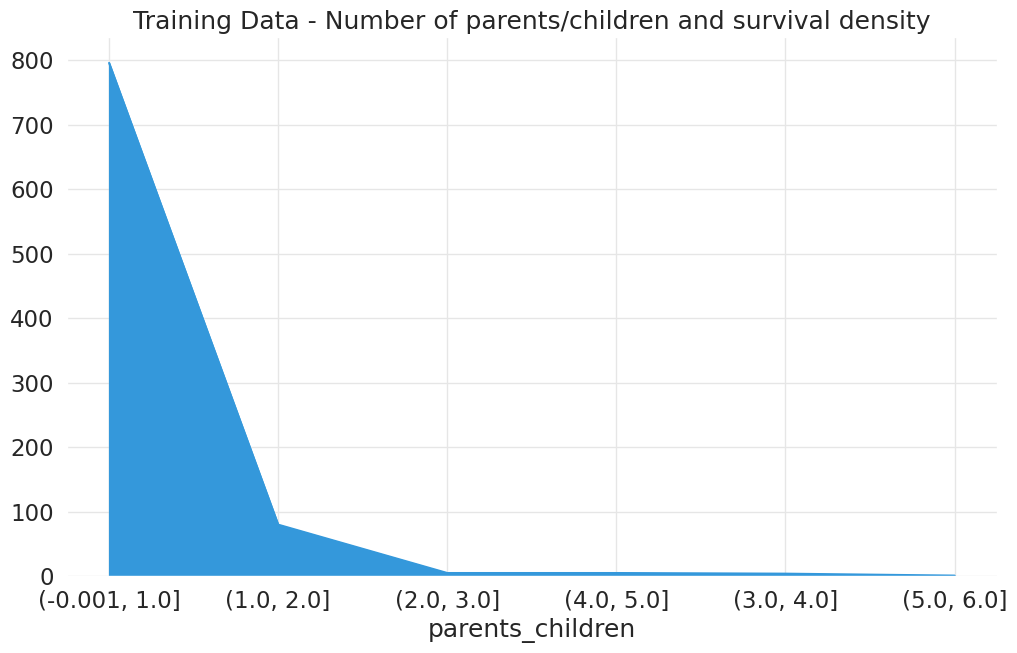

In [26]:
pc = pd.DataFrame()
pc['survived'] = td.Survived
pc['parents_children'] = pd.cut(td.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(pc.parents_children.value_counts()).plot.area().set_title("Training Data - Number of parents/children and survival density")

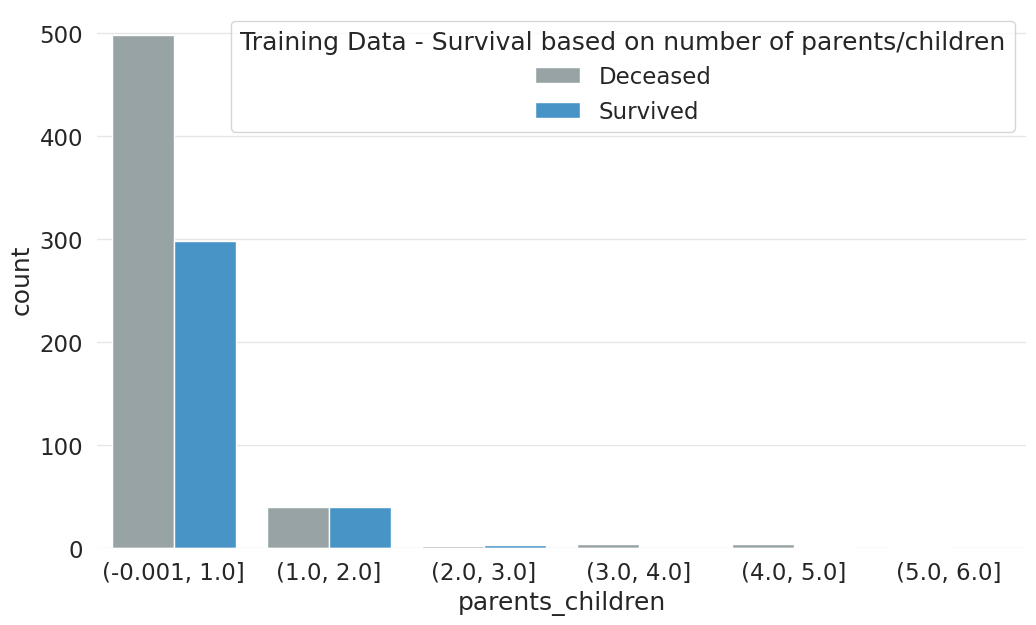

In [27]:
x = sns.countplot(x = "parents_children", hue = "survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - Survival based on number of parents/children")


In [28]:
td['Family'] = td.Parch + td.SibSp
td['Is_Alone'] = td.Family == 0

Подобно SibSp, этот признак содержит количество родителей или детей, с которыми путешествовал каждый пассажир. Максимум 9 родителей/детей путешествовали вместе с одним из пассажиров.

Логично объединить эти данные. Для хранения суммарных значений «Parch» и «SibSp» следует добавить столбец «Family».

Максимальные шансы на выживание были у одинокого путешественника.
Для выделения таких пассажиров создадим столбец Is_Alone и присвоим значение True, если значение в столбце «Family» было нулевым.


### Ticket



Значения столбца «Ticket» не существенны для анализа, следовательно, ими можно пренебречь.

### Fare

Разделив сумму тарифа на четыре категории, стало очевидно, что существует тесная связь между стоимостью тарифа и выживанием. Чем больше заплатит пассажир, тем выше будут его шансы на выживание.

Добавим новые категории тарифов в добавленный новый столбец Fare_Category.


In [29]:
td.Fare.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [30]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])

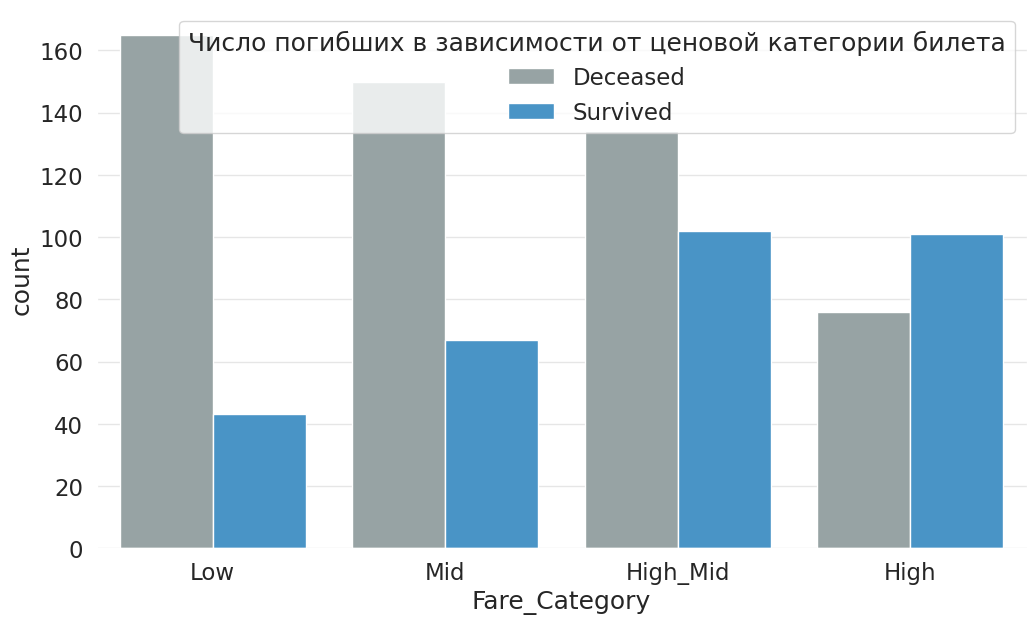

In [31]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Число погибших в зависимости от ценовой категории билета")


###  Номер каюты
Значения столбца «Номер каюты» не существенны для анализа, следовательно, ими можно пренебречь.


###  Порт
Данный столбец хранит информацию о порте посадки пассажира. Есть три возможных значения для Embarked -  Саутгемптон, Шербург и Куинстаун. Более 70% людей сели в Саутгемптон. Чуть менее 20% взошли на борт в Шербуре, а остальные — из Квинстауна. Причем люди, которые присоединились к рейсу в порту Шербург, имели более высокие шансы на выживание, чем люди, которые сели в портах Саутгемптон или Квинстаун.

<ipython-input-32-7180798>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])


Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

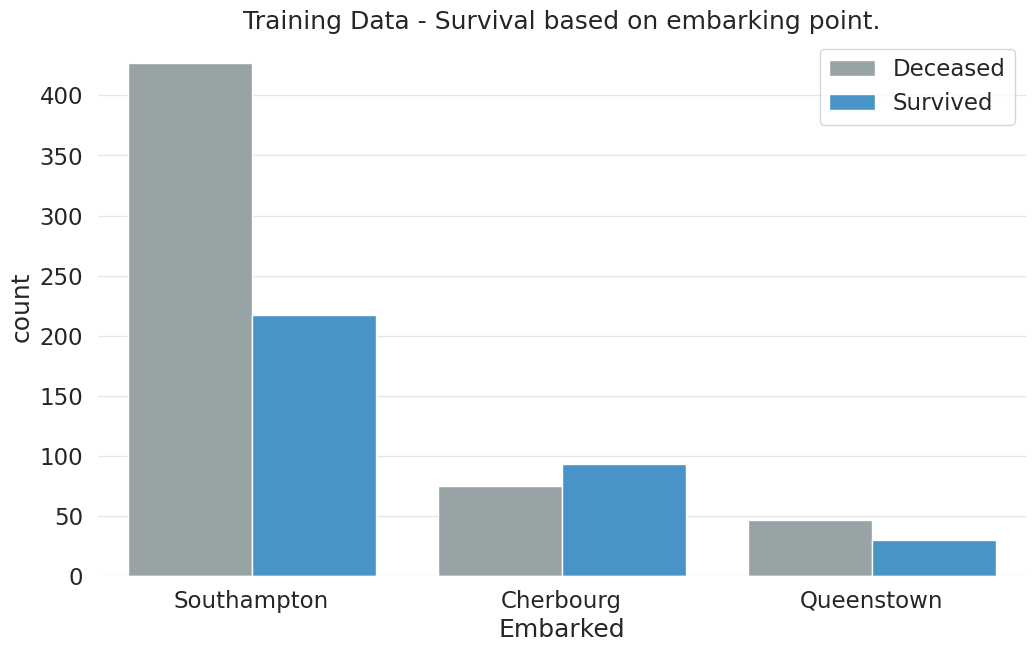

In [32]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = td, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Training Data - Survival based on embarking point.")

## Заполнение пропущенных данных
Чтобы не потерять полноту данных следует заполнить пропущенные значения.

### 1. Embarked
Поскольку у параметра «Embarked» было только два пропущенных значения и наибольшее количество пассажиров отправлялось из Саутгемптона, вероятность посадки в Саутгемптоне выше. Таким образом заполним недостающие значения пункта посадки на Саутгемптон. Для упрощения работы с данными, чтобы вручную не вводить «Саутгемптон», найдем моду столбца Embarked и подставим ее в отсутствующие значения.

*Мода — наиболее часто встречающийся элемент в выборке.


In [33]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

<ipython-input-33-2291491131>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)


### Возраст

Столбец «Age» имеет 263 пропущенных значения. Для более точного заполнения пропущенных значений классифицируем людей на основе их имени. Разделение строк простого Python было достаточно, чтобы извлечь префикс для обращений (например, Mr, Miss, Mrs) из каждого имени. Получается 18 различных наименований.

In [34]:
td.Name[0]

'Braund, Mr. Owen Harris'

In [35]:
td.Name[0].split(',')

['Braund', ' Mr. Owen Harris']

In [36]:
td.Name[0].split(',')[1]

' Mr. Owen Harris'

In [37]:
td.Name[0].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [38]:
td.Name[0].split(',')[1].split('.')[0]

' Mr'

In [39]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
td.Salutation.nunique()
td.Salutation.value_counts()

,count
Salutation,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


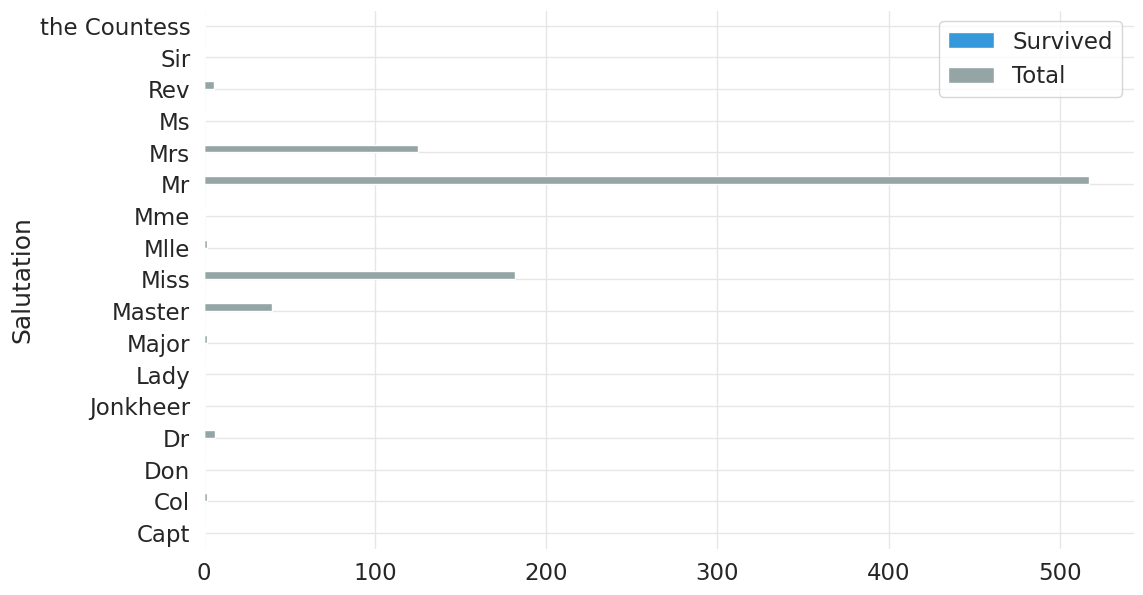

In [40]:
sal_df = pd.DataFrame({
    "Survived":
    td[td.Survived == 1].Salutation.value_counts(),
    "Total":
        td.Salutation.value_counts()
})
s = sal_df.plot.barh()

In [41]:
grp = td.groupby(['Sex', 'Pclass'],group_keys=False)
td.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#If still any row remains
td.Age.fillna(td.Age.median, inplace = True)

### Cabin

Колонка «Cabin» содержит много пропущенных данных. Определим все отсутствующие данные в отдельный класс. Назовем его NA и заполним все пропущенные значения этим значением.

In [42]:
td.Cabin = td.Cabin.fillna('NA')